In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import yaml
from scipy import stats
from matplotlib.ticker import FormatStrFormatter

In [2]:
data_id = "24"

with open(f'my_data{data_id}.yaml') as f:
    data = yaml.safe_load(f)

ERROR
skipped concurrency 1


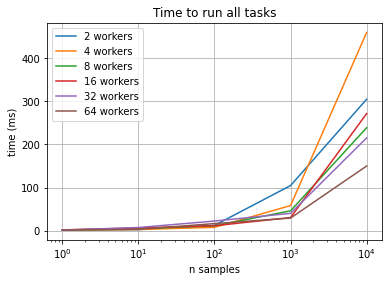

In [3]:
# TOTAL WF TIME
# OVERHEAD TYPE 2
    
concurrencies = [1,2,4,8,16,32,64]
samples = [1,10,100,1000,10000]
fig, ax = plt.subplots()

for con in concurrencies:
    all_task_times = []
    for name, val in data.items():
        if f"c{con}_" in name and "start verify" in name:
            if "ERROR" in str(val):
                print("ERROR")
                break
            start_verify = val
        if f"c{con}_" in name and "start run-workers" in name:
            start_run_workers = val
            all_task_times.append((start_verify - start_run_workers))
        
    try:
        ax.plot(samples, all_task_times, label=f"{con} workers")
    except ValueError as e:
        print(f"skipped concurrency {con}")
        continue
        
plt.xscale("log")
ax.legend()

ax.set(xlabel='n samples', ylabel='time (ms)',
               title='Time to run all tasks')
ax.grid()

#fig.savefig(f"figs/all_task_time__{data_id}.png")
plt.show()

skipped concurrency 32


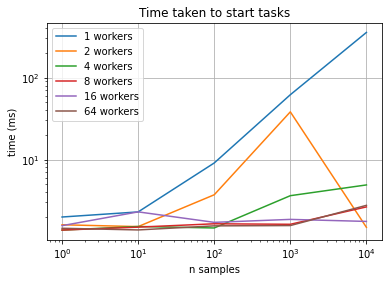

In [4]:
# TIME TO START WORKING ON TASKS
# OVERHEAD TYPE 4
    
concurrencies = [1,2,4,8,16,32,64]
samples = [1,10,100,1000,10000]
fig, ax = plt.subplots()

for con in concurrencies:
    all_task_times = []
    for name, val in data.items():
        if f"c{con}_" in name and "start run-workers" in name:
            start_run_workers = val
        if f"c{con}_" in name and "start samp1" in name:
            if "ERROR" in str(val):
                print("ERROR")
                break
            start_samp1 = val
            all_task_times.append((start_samp1 - start_run_workers))
        
    try:
        ax.plot(samples, all_task_times, label=f"{con} workers")
    except ValueError as e:
        print(f"skipped concurrency {con}")
        continue
        
plt.xscale("log")
plt.yscale("log")
ax.legend()

ax.set(xlabel='n samples', ylabel='time (ms)',
               title='Time taken to start tasks')
ax.grid()

#fig.savefig(f"figs/task_start_time__{data_id}.png")
plt.show()

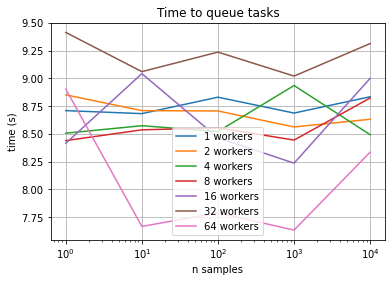

In [5]:
# TIME TO QUEUE ALL TASKS
# OVERHEAD TYPE 3
    
concurrencies = [1,2,4,8,16,32,64]
samples = [1,10,100,1000,10000]
fig, ax = plt.subplots()

for con in concurrencies:
    all_task_times = []
    for name, val in data.items():
        #print(name)
        if f"c{con}_" in name and "merlin run" in name:
            queue_tasks = val
            all_task_times.append(queue_tasks)
        
    try:
        ax.plot(samples, all_task_times, label=f"{con} workers")
    except ValueError as e:
        print(f"skipped concurrency {con}")
        continue

plt.xscale("log")
ax.legend()

ax.set(xlabel='n samples', ylabel='time (s)',
               title='Time to queue tasks')
ax.grid()

#fig.savefig(f"figs/task_queue_time__{data_id}.png")
plt.show()

0.7442430574446917
2.7759764213114977
20.402641288936138
180.83997355215251
580.1273428741843
0.8006323464214802
2.8981039952486753
21.372075216844678
198.7421427424997
1126.3709949702024
0.8318693656474352
3.387021565809846
24.896319828927517
215.79255537688732
1701.6337991468608
0.8890715688467026
5.187768625095487
45.22505746036768
336.4043520782143
1709.1239855252206
1.2589366398751736
6.559797050431371
47.88312021829188
417.9790803864598
3938.73976011388
0.6600918993353844
8.298383688554168
80.26624206267297
802.4906827341765
5763.30300742574
1.6109648011624813
3.6980959307402372
59.007148729637265
627.0551086328924
3898.983992345631


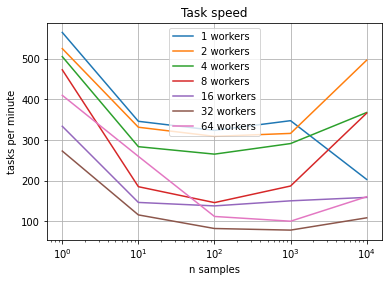

In [6]:
# TASK SPEED
# OVERHEAD TYPE 1
    
concurrencies = [1,2,4,8,16,32,64]
samples = [1,10,100,1000,10000]
fig, ax = plt.subplots()

for con in concurrencies:
    t_per_m = []
    for name, times in data.items():
        if f"c{con}_" in name and " " not in name:
            n_tasks = len(times)
            seconds = sum(times)
            print(seconds)
            mins = seconds / 60.0
            if mins == 0:
                t_per_m.append(0)
                continue
            tasks_per_min = n_tasks / mins
            t_per_m.append(tasks_per_min)
    ax.plot(samples, t_per_m, label=f"{con} workers")

plt.xscale("log")
ax.legend()

ax.set(xlabel='n samples', ylabel='tasks per minute',
               title='Task speed')
ax.grid()

#fig.savefig(f"figs/task_speed__{data_id}.png")
plt.show()

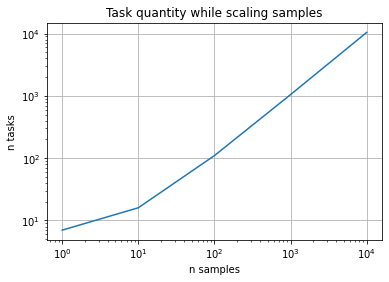

In [7]:
concurrency = 16

n_tasks = []
for sam in samples:
    for name, times in data.items():
        if name.endswith(f"_s{sam}") and name.startswith(f"c16_"):
            n_tasks.append(len(times))
            
fig, ax = plt.subplots()
ax.plot(samples, n_tasks)
plt.xscale("log")
plt.yscale("log")
ax.set(xlabel='n samples', ylabel='n tasks',
       title='Task quantity while scaling samples')
ax.grid()

#fig.savefig(f"figs/n_tasks3__{data_id}.png")
plt.show()

WITH OUTLIERS
71640 task times
20.0349652338773: max task time
0.30480514153638477: mean task time
1.4857051481105574: standard deviation

WITHOUT OUTLIERS
4191 task times
67449 task times
0.1749193836003542: max task time
0.06961962322764875: mean task time
0.03216156591271992: standard deviation


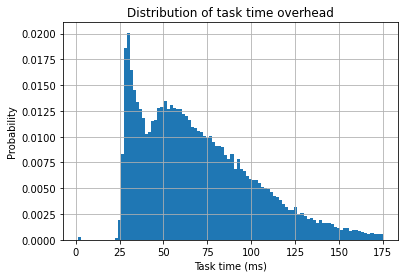

In [8]:
# OVERHEAD TYPE 1
# combining data from all concurrencies and sample quantities

def is_outlier(points, thresh=3):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

x = []
fig, ax = plt.subplots()

for name, times in data.items():
    if " " not in name:
        x += times

x = np.array(x)
#mad = stats.median_absolute_deviation(x)
outlier_mask = is_outlier(x)

print("WITH OUTLIERS")
print(f"{len(x)} task times")
print(f"{max(x)}: max task time")
print(f"{np.mean(x)}: mean task time")
print(f"{np.std(x)}: standard deviation")
outliers = x[outlier_mask]
non_outliers = x[~outlier_mask]
print("\nWITHOUT OUTLIERS")
print(f"{len(outliers)} task times")
print(f"{len(non_outliers)} task times")
print(f"{max(non_outliers)}: max task time")
print(f"{np.mean(non_outliers)}: mean task time")
print(f"{np.std(non_outliers)}: standard deviation")

n_bins = 100

ax.grid()
plt.hist(non_outliers*1000, bins=n_bins, density=True)
plt.xlabel('Task time (ms)')
plt.ylabel('Probability')
ax.set(title='Distribution of task time overhead')
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
#plt.savefig(f"figs/histogram__{data_id}.png")

plt.show()